In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_format = 'retina'

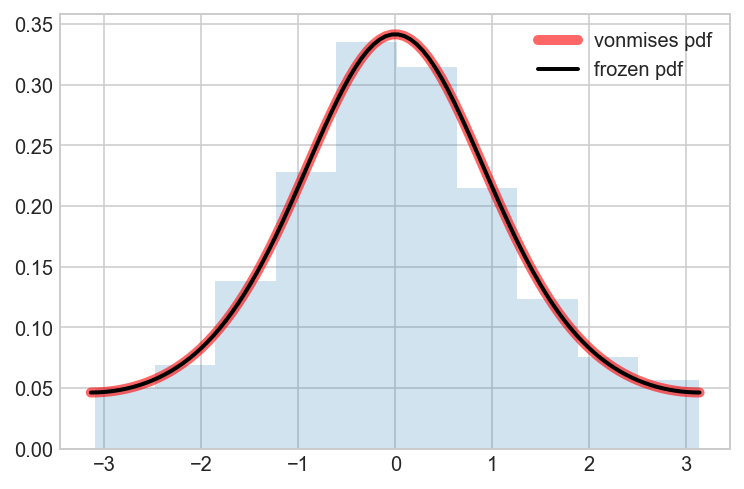

In [48]:
from scipy import stats
from scipy.stats import vonmises, vonmises_line
# https://en.wikipedia.org/wiki/Von_Mises_distribution
# Von MIsses
fig, ax = plt.subplots(1, 1)

kappa = 1
loc = 0
x = np.linspace(vonmises.ppf(0.0001, kappa,loc),
                vonmises.ppf(0.9999, kappa,loc), 100)
ax.plot(x, vonmises.pdf(x, kappa,loc),
       'r-', lw=5, alpha=0.6, label='vonmises pdf')


rv = vonmises(kappa,loc)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

r = vonmises.rvs(kappa,loc, size=1000)

ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

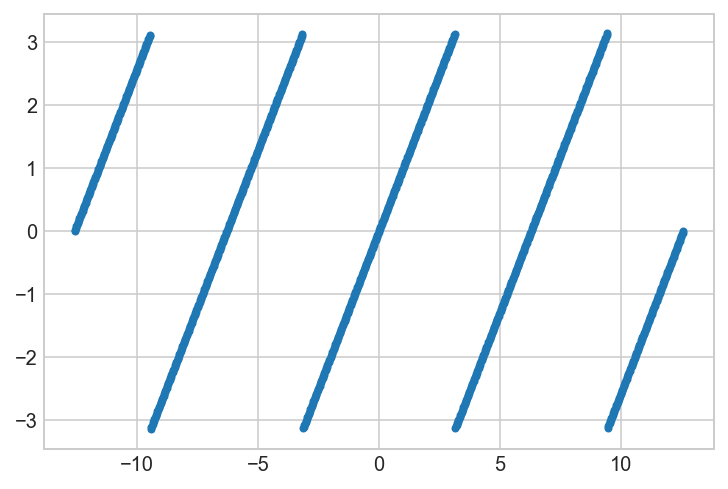

In [33]:
t = np.linspace(-4*pi,4*pi,num=1000)
y = (t+pi)%(2*pi)-pi
plt.plot(t,y,'.')

array([1.61414929e-11, 3.22893727e-11, 4.84500338e-11, 6.46298852e-11,
       8.08353579e-11, 9.70729124e-11, 1.13349046e-10, 1.29670301e-10,
       1.46043270e-10, 1.62474609e-10, 1.78971037e-10, 1.95539352e-10,
       2.12186435e-10, 2.28919257e-10, 2.45744892e-10, 2.62670520e-10,
       2.79703442e-10, 2.96851084e-10, 3.14121008e-10, 3.31520920e-10,
       3.49058685e-10, 3.66742331e-10, 3.84580063e-10, 4.02580271e-10,
       4.20751544e-10, 4.39102681e-10, 4.57642701e-10, 4.76380857e-10,
       4.95326648e-10, 5.14489833e-10, 5.33880445e-10, 5.53508804e-10,
       5.73385533e-10, 5.93521574e-10, 6.13928202e-10, 6.34617045e-10,
       6.55600099e-10, 6.76889748e-10, 6.98498782e-10, 7.20440418e-10,
       7.42728321e-10, 7.65376623e-10, 7.88399950e-10, 8.11813445e-10,
       8.35632790e-10, 8.59874235e-10, 8.84554626e-10, 9.09691430e-10,
       9.35302769e-10, 9.61407451e-10, 9.88024999e-10, 1.01517569e-09,
       1.04288060e-09, 1.07116161e-09, 1.10004149e-09, 1.12954391e-09,
      

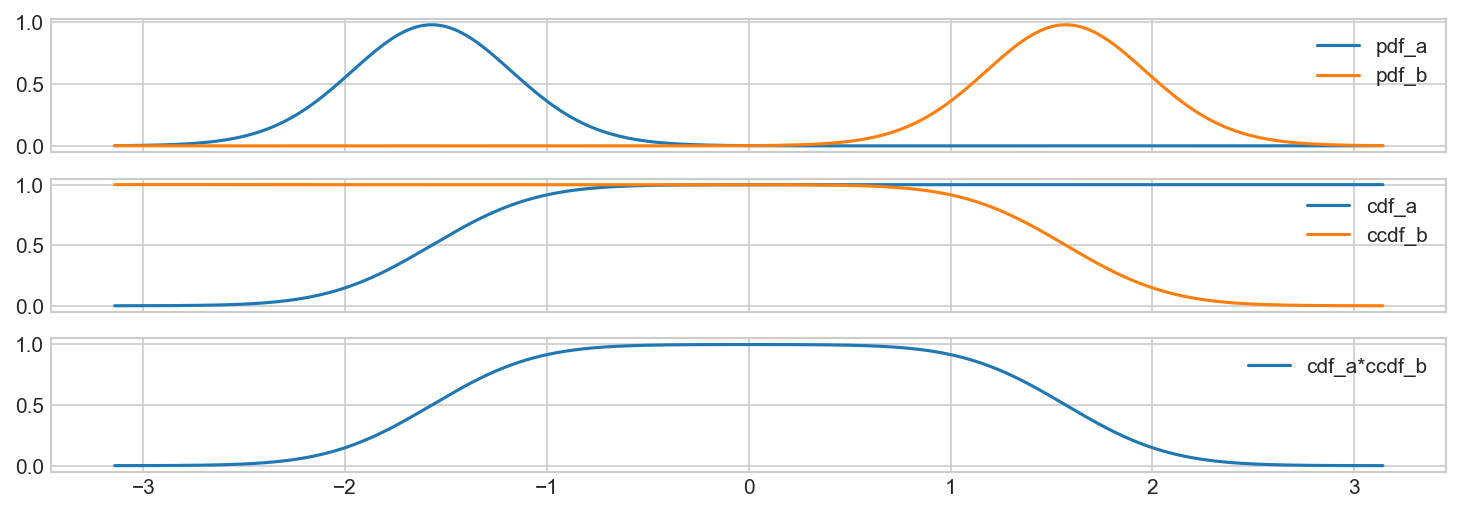

In [125]:
def vonMisesPdf(x,mu,kappa):
    return np.exp(kappa*(np.cos(x-mu)))/(2*pi*scipy.special.i0(kappa))


pi = np.pi
kappa = 2*pi

tab = pi
ta = -tab/2
tb = tab/2
# ta = -pi/2
# tb = pi/2

t = np.linspace(-pi,pi,10000)

# a= (t-ta+pi)%(2*pi)-pi
# pdf_a = vonmises.pdf(a, kappa)
pdf_a = vonMisesPdf(t,ta,kappa)

cdf_a = np.zeros_like(t)
cdf_a[1:] = scipy.integrate.cumulative_trapezoid(pdf_a,x=t)

# b= (t-tb+pi)%(2*pi)-pi
# pdf_b = vonmises.pdf(b, kappa)
pdf_b = vonMisesPdf(t,tb,kappa)
cdf_b = np.zeros_like(t)
cdf_b[1:] = scipy.integrate.cumulative_trapezoid(pdf_b,x=t)
ccdf_b = 1 - cdf_b


fig, ax = plt.subplots(3, 1, figsize=(12, 4), dpi=75,sharex=True)
# fig.subplots_adjust(hspace=0)

ax[0].plot(t,pdf_a,label='pdf_a')
ax[0].plot(t,pdf_b,label='pdf_b')

ax[1].plot(t,cdf_a,label='cdf_a')
ax[1].plot(t,ccdf_b,label='ccdf_b')

# t_bar = (t-pi/2+pi)%(2*pi)-pi
ax[2].plot(t,cdf_a*ccdf_b,label="cdf_a*ccdf_b")

for axi in ax:
    axi.legend(loc='best', frameon=False)

# plt.tight_layout()

[-3.14159265e+00 -1.57079633e+00  2.22044605e-16  1.57079633e+00
  3.14159265e+00]


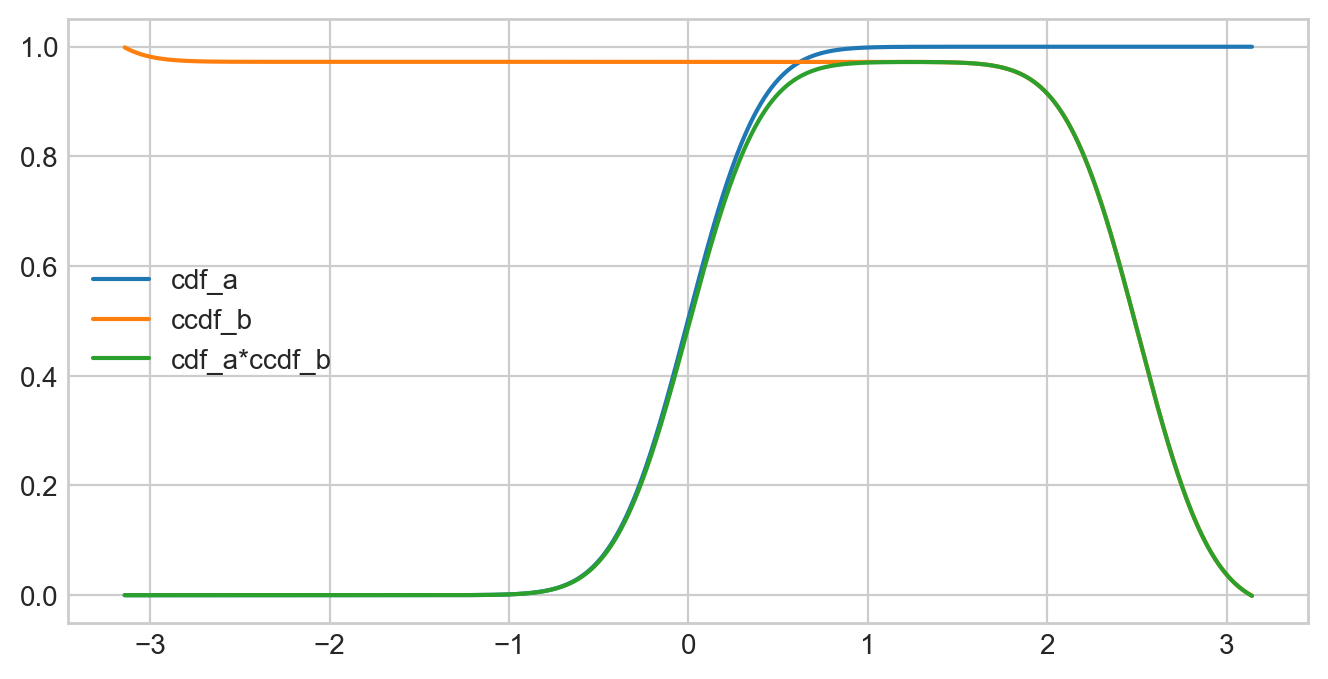

In [12]:
import scipy
import scipy.integrate as integrate

pi = np.pi
# fig, ax = plt.subplots(1, 1)
t = np.linspace(0,1,1000)

t0 = 0

t = -pi +2*pi*((t-t0)) 
print(np.percentile(t, (0,25,50,75,100)))
a = 0

b = 0.8*pi

kappa =10
def vonMisesPdf(x,mu,kappa):
    return np.exp(kappa*(np.cos(x-mu)))/(2*pi*scipy.special.i0(kappa))

pdf_a = vonMisesPdf(t,mu=a,kappa=kappa)
cdf_a = np.cumsum(pdf_a)*((t[-1]-t[0])/(len(t)-1))

pdf_b = vonMisesPdf(t,mu=b,kappa=kappa)
cdf_b = np.cumsum(pdf_b)*((t[-1]-t[0])/(len(t)-1))
ccdf_b = 1-np.cumsum(pdf_b)*((t[-1]-t[0])/(len(t)-1))


fig, ax= plt.subplots(1,1 ,figsize=(8,4),dpi=100)
ax.plot(t,cdf_a,label="cdf_a")
ax.plot(t,ccdf_b,label="ccdf_b")
ax.plot(t,cdf_a*ccdf_b,label="cdf_a*ccdf_b")
plt.legend()

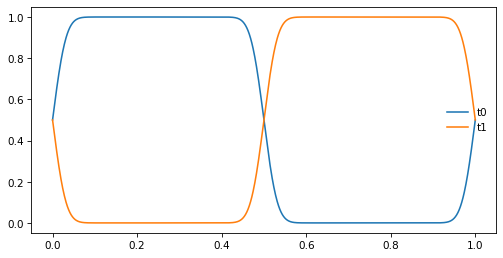

In [6]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
# import rvlib # https://github.com/QuantEcon/rvlib
import numba

def phaseIndicator(t,t0,a,b,sigma):
    t_ = ((t - t0)%1)*2.-1. # map [0,1]->[-1,1]
#     ndist_a = rvlib.Normal(mu=a*2.-1.,sigma=sigma)
    ndist_a = stats.norm(a*2.-1.,sigma)
#     cdf_a = ndist_a.cdf(t_)
    cdf_a = (ndist_a.cdf(t_)-ndist_a.cdf(-1))/(ndist_a.cdf(1)-ndist_a.cdf(-1))
#     ndist_b = rvlib.Normal(mu=b*2.-1.,sigma=sigma)
    ndist_b = stats.norm(b*2.-1.,sigma)
    ccdf_b = 1- (ndist_b.cdf(t_)-ndist_b.cdf(-1))/(ndist_b.cdf(1)-ndist_b.cdf(-1))
#     ccdf_b = ndist_b.ccdf(t_)
    return cdf_a*ccdf_b


t = np.linspace(0,1,1000)
a = 0.25
b = 0.75
sigma = 0.05
t0 = 0.75
t1 = 0.25

e_i0 = phaseIndicator(t,t0,a,b,sigma)
e_i1 = phaseIndicator(t,t1,a,b,sigma)

fig, ax= plt.subplots(1,1 ,figsize=(8,4),dpi=75)

ax.plot(t,e_i0,label="t0")
ax.plot(t,e_i1,label="t1")

plt.legend(loc='best', frameon=False)

In [338]:
import numpy as np
import numba

@numba.njit(nogil=True,fastmath=True,cache=True)
def logistic_cdf(x,mu,s):
    return 1/(1+np.exp(-(x-mu)/s))

@numba.njit(nogil=True,fastmath=True,cache=True)
def phaseIndicator(t,t0,a,b,s):
    """
    phase indicator function with logistic distribution
    ref: https://en.wikipedia.org/wiki/Logistic_distribution
    Input:
        t:  normalized phase [0-1]
        t0: phase offset [0-1]
        a:  mean [0-1]
        b:  mean [0-1]
        s:  variance [0-1]
    returns:
        phase indicator
    """
    t_ = ((t - t0)%1)*2.-1. # map [0,1]->[-1,1]
    mu_a = a*2.-1.
    # cumulative distribution function
    cdf_a = (logistic_cdf(t_,mu_a,s)- logistic_cdf(-1,mu_a,s))/(logistic_cdf(1,mu_a,s) - logistic_cdf(-1,mu_a,s))
    mu_b = b*2.-1.
    # complementary cumulative distribution function
    ccdf_b = 1-(logistic_cdf(t_,mu_b,s)- logistic_cdf(-1,mu_b,s))/(logistic_cdf(1,mu_b,s) - logistic_cdf(-1,mu_b,s))
    return cdf_a*ccdf_b

@numba.experimental.jitclass([
    ("a", numba.float32),
    ("b", numba.float32),
    ("s", numba.float32),
    ("t0", numba.float32),
    ("t1", numba.float32),
    ("ys", numba.float32),
    ("y0", numba.float32),
])
class phaseIndicatorPair:
    def __init__(self,a,b,s,t0,t1, ys = 1.,y0 = 0.):
        """ create a parir of phase indicator
        Args:
            a # separation point for increasing from 0 -> 1
            b # separation point for decreasing from 1 -> 0
            s # sigma, shared variance
            t0 # normlaized phase offset [0-1] for the 1st value in the pair
            t1 # normlaized phase offset [0-1] for the 2nd value in the pair
            ys # vertical scale
            y0 # vertical offset
            return 2 of phaseIndicator*ys +y0
        """
        
        self.a = a # separation point for increasing from 0 -> 1
        self.b = b # separation point for decreasing from 1 -> 0
        self.s = s # variance
        self.t0 = t0 # normlaized phase offset [0-1] for the 1st value in the pair
        self.t1 = t1 # normlaized phase offset [0-1] for the 2nd value in the pair
        self.ys = ys # vertical offset
        self.y0 = y0 # vertical scale
    def get(self,t):
        """ return a pair of phase indicator values give noramlized time t"""
        return phaseIndicator(t,self.t0,self.a,self.b,self.s)*self.ys+self.y0,\
                phaseIndicator(t,self.t1,self.a,self.b,self.s)*self.ys+self.y0,
    

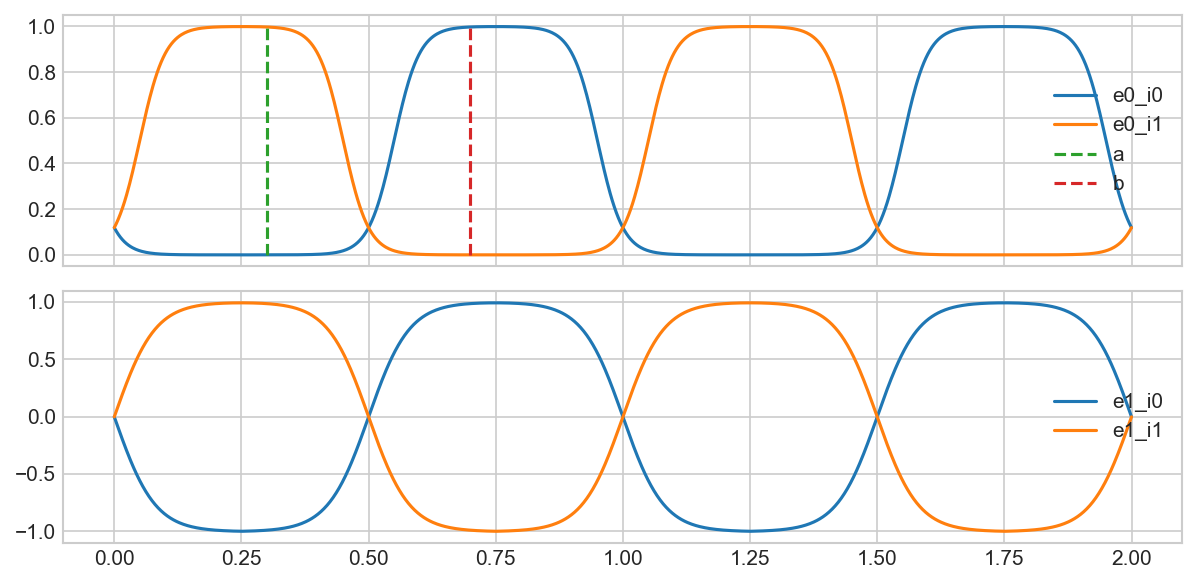

In [349]:
t = np.linspace(0, 2, 1000)
a = 0.3
b = 0.7
s = 0.05

t0 = 0.25
t1 = 0.75
y0 = 0


# a = 0.25
# b = 0.75
# s = 0.1

# t0 = 0.25
# t1 = 0.75
# y0 = -0.


# e_i0 = phaseIndicator(t,t0,a,b,s)
# e_i1 = phaseIndicator(t,t1,a,b,s)


phase_indicator_pair_0 = phaseIndicatorPair(a=0.3, b=0.7, s=0.05, t0=0.25, t1=0.75, ys = 1., y0=0.)

phase_indicator_pair_1 = phaseIndicatorPair(a=0.25, b=0.75, s=0.08, t0=0.25, t1=0.75, ys = 2., y0=-1.)


e0_i0, e0_i1 = phase_indicator_pair_0.get(t)

e1_i0, e1_i1 = phase_indicator_pair_1.get(t)


fig, ax = plt.subplots(2, 1, figsize=(8, 4), dpi=75,sharex=True)
ax[0].plot(t, e0_i0, label="e0_i0")
ax[0].plot(t, e0_i1, label="e0_i1")
ax[1].plot(t, e1_i0, label="e1_i0")
ax[1].plot(t, e1_i1, label="e1_i1")

ax[0].plot([a, a], [0, 1], '--', label='a')
ax[0].plot([b, b], [0, 1], '--', label='b')

ax[0].legend(loc='best', frameon=False)
ax[1].legend(loc='best', frameon=False)

plt.tight_layout()

In [323]:
ax

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

In [9]:
%timeit e_i = phaseIndicator(t,t0,a,b,sigma)

21.8 µs ± 443 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


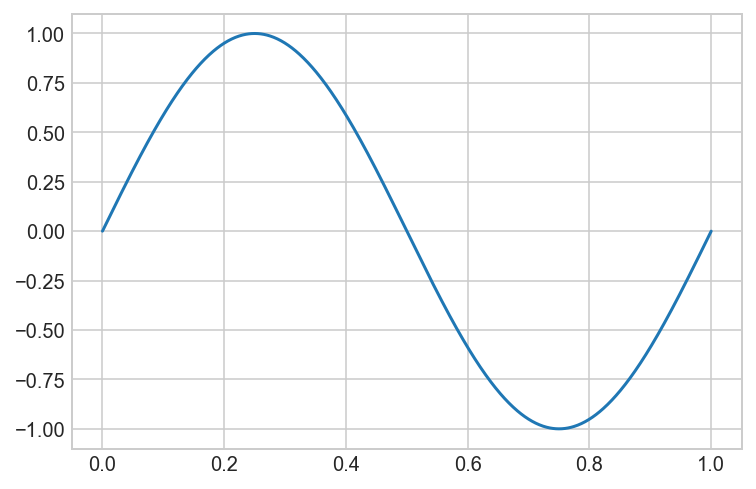

In [310]:
def kth_root(x,k):
    if k % 2 != 0:
        res = np.power(np.abs(x),1./k)
        return res*np.sign(x)
    else:
        return np.power(np.abs(x),1./k)

t = np.linspace(0,1,1000)
y = np.sin(t*2*np.pi)
# y = logistic_cdf(t,0,1)

plt.plot(t,y)

In [47]:
# tcn

import torch
import torch.nn as nn
from torch.nn.utils import weight_norm
from collections import OrderedDict



####

class SinActivation(nn.Module):
    def __init__(self,omega=30.):
        super().__init__() # init the base class
        self.omega = omega
    def forward(self, input):
        return torch.sin(self.omega*input)

####

class Chomp1d(nn.Module):
    def __init__(self, chomp_size):
        super(Chomp1d, self).__init__()
        self.chomp_size = chomp_size

    def forward(self, x):
        return x[:, :, :-self.chomp_size].contiguous()

    def __repr__(self):
        return f"Chomp1d(chomp_size={self.chomp_size})"

class TemporalBlock(nn.Module):
    def __init__(self, n_inputs, n_outputs, kernel_size, stride, dilation, padding, dropout=0.2):
        super(TemporalBlock, self).__init__()
        conv1 = weight_norm(nn.Conv1d(n_inputs, n_outputs, kernel_size,
                                          stride=stride, padding=padding, dilation=dilation))
        conv2 = weight_norm(nn.Conv1d(n_outputs, n_outputs, kernel_size,
                                           stride=stride, padding=padding, dilation=dilation))
        # self.net = nn.Sequential(conv1, chomp1, relu1, dropout1,
        #                          conv2, chomp2, relu2, dropout2)  
        self.net = nn.Sequential(OrderedDict([
            ("conv1",   conv1),
            ("chomp1",  Chomp1d(padding)),
            ("relu1",   nn.ReLU()),
            ("dropout1",nn.Dropout(dropout)),
            ("conv2",   conv2),
            ("chomp2",  Chomp1d(padding)),
            ("relu2",   nn.ReLU()),
            ("dropout2",nn.Dropout(dropout))
        ]))
        self.downsample = nn.Conv1d(n_inputs, n_outputs, 1) if n_inputs != n_outputs else None
#         self.relu = nn.LeakyReLU()
        self.relu = nn.ReLU()
        self.init_weights()

    def init_weights(self):
        self.net.conv1.weight.data.normal_(0, 0.01)
        self.net.conv2.weight.data.normal_(0, 0.01)
#         self.conv1.weight.data.normal_(0, 0.01)
#         self.conv2.weight.data.normal_(0, 0.01)
        if self.downsample is not None:
            self.downsample.weight.data.normal_(0, 0.01)

    def forward(self, x):
        out = self.net(x)
        res = x if self.downsample is None else self.downsample(x)
        return self.relu(out + res)


class TemporalConvNet(nn.Module):
    def __init__(self, num_inputs, num_channels, kernel_size=2, dropout=0.2):
        super(TemporalConvNet, self).__init__()
        layers = []
        num_levels = len(num_channels)
        for i in range(num_levels):
            dilation_size = 2 ** i
            in_channels = num_inputs if i == 0 else num_channels[i-1]
            out_channels = num_channels[i]
            layers += [TemporalBlock(in_channels, out_channels, kernel_size, stride=1, dilation=dilation_size,
                                     padding=(kernel_size-1) * dilation_size, dropout=dropout)]

        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

In [48]:
self = TemporalConvNet(2,[2])

In [49]:
print(self)

TemporalConvNet(
  (network): Sequential(
    (0): TemporalBlock(
      (net): Sequential(
        (conv1): Conv1d(2, 2, kernel_size=(2,), stride=(1,), padding=(1,))
        (chomp1): Chomp1d(chomp_size=1)
        (relu1): ReLU()
        (dropout1): Dropout(p=0.2, inplace=False)
        (conv2): Conv1d(2, 2, kernel_size=(2,), stride=(1,), padding=(1,))
        (chomp2): Chomp1d(chomp_size=1)
        (relu2): ReLU()
        (dropout2): Dropout(p=0.2, inplace=False)
      )
      (relu): ReLU()
    )
  )
)


In [50]:
############################ model

class TCN(nn.Module):
    def __init__(self, input_size, output_size, num_channels, kernel_size, dropout):
        super(TCN, self).__init__()
        self.tcn = TemporalConvNet(input_size, num_channels, kernel_size=kernel_size, dropout=dropout)
        self.linear = nn.Linear(num_channels[-1], output_size)
        self.init_weights()

    def init_weights(self):
        self.linear.weight.data.normal_(0, 0.01)

    def forward(self, x):
        y1 = self.tcn(x)
        return self.linear(y1[:, :, -1])
    
######################### utils

import torch
import numpy as np
from torch.autograd import Variable

def data_generator(N, seq_length):
    """
    Args:
        seq_length: Length of the adding problem data
        N: # of data in the set
    """
    X_num = torch.rand([N, 1, seq_length])
    X_mask = torch.zeros([N, 1, seq_length])
    Y = torch.zeros([N, 1])
    for i in range(N):
        positions = np.random.choice(seq_length, size=2, replace=False)
        X_mask[i, 0, positions[0]] = 1
        X_mask[i, 0, positions[1]] = 1
        Y[i,0] = X_num[i, 0, positions[0]] + X_num[i, 0, positions[1]]
    X = torch.cat((X_num, X_mask), dim=1)
    return X,Y
#     return Variable(X), Variable(Y)


######################### main

import torch
import argparse
import torch.optim as optim
import torch.nn.functional as F
import sys


parser = argparse.ArgumentParser(description='Sequence Modeling - The Adding Problem')
parser.add_argument('--batch_size', type=int, default=32, metavar='N',
                    help='batch size (default: 32)')
parser.add_argument('--cuda', action='store_false',
                    help='use CUDA (default: True)')
parser.add_argument('--dropout', type=float, default=0.0,
                    help='dropout applied to layers (default: 0.0)')
parser.add_argument('--clip', type=float, default=-1,
                    help='gradient clip, -1 means no clip (default: -1)')
parser.add_argument('--epochs', type=int, default=10,
                    help='upper epoch limit (default: 10)')
parser.add_argument('--ksize', type=int, default=7,
                    help='kernel size (default: 7)')
parser.add_argument('--levels', type=int, default=8,
                    help='# of levels (default: 8)')
parser.add_argument('--seq_len', type=int, default=400,
                    help='sequence length (default: 400)')
parser.add_argument('--log-interval', type=int, default=100, metavar='N',
                    help='report interval (default: 100')
parser.add_argument('--lr', type=float, default=4e-3,
                    help='initial learning rate (default: 4e-3)')
parser.add_argument('--optim', type=str, default='Adam',
                    help='optimizer to use (default: Adam)')
parser.add_argument('--nhid', type=int, default=30,
                    help='number of hidden units per layer (default: 30)')
parser.add_argument('--seed', type=int, default=1111,
                    help='random seed (default: 1111)')
args = parser.parse_args("")

torch.manual_seed(args.seed)
if torch.cuda.is_available():
    if not args.cuda:
        print("WARNING: You have a CUDA device, so you should probably run with --cuda")

input_channels = 2
n_classes = 1
batch_size = args.batch_size
seq_length = args.seq_len
epochs = args.epochs

print(args)
print("Producing data...")
X_train, Y_train = data_generator(50000, seq_length)
X_test, Y_test = data_generator(1000, seq_length)


# Note: We use a very simple setting here (assuming all levels have the same # of channels.
channel_sizes = [args.nhid]*args.levels
kernel_size = args.ksize
dropout = args.dropout
model = TCN(input_channels, n_classes, channel_sizes, kernel_size=kernel_size, dropout=dropout)

if args.cuda:
    model.cuda()
    X_train = X_train.cuda()
    Y_train = Y_train.cuda()
    X_test = X_test.cuda()
    Y_test = Y_test.cuda()

lr = args.lr
optimizer = getattr(optim, args.optim)(model.parameters(), lr=lr)


def train(epoch):
    global lr
    model.train()
    batch_idx = 1
    total_loss = 0
    for i in range(0, X_train.size(0), batch_size):
        if i + batch_size > X_train.size(0):
            x, y = X_train[i:], Y_train[i:]
        else:
            x, y = X_train[i:(i+batch_size)], Y_train[i:(i+batch_size)]
        optimizer.zero_grad()
        output = model(x)
        loss = F.mse_loss(output, y)
        loss.backward()
        if args.clip > 0:
            torch.nn.utils.clip_grad_norm_(model.parameters(), args.clip)
        optimizer.step()
        batch_idx += 1
        total_loss += loss.item()

        if batch_idx % args.log_interval == 0:
            cur_loss = total_loss / args.log_interval
            processed = min(i+batch_size, X_train.size(0))
            print('Train Epoch: {:2d} [{:6d}/{:6d} ({:.0f}%)]\tLearning rate: {:.4f}\tLoss: {:.6f}'.format(
                epoch, processed, X_train.size(0), 100.*processed/X_train.size(0), lr, cur_loss))
            total_loss = 0


def evaluate():
    model.eval()
    with torch.no_grad():
        output = model(X_test)
        test_loss = F.mse_loss(output, Y_test)
        print('\nTest set: Average loss: {:.6f}\n'.format(test_loss.item()))
        return test_loss.item()


for ep in range(1, epochs+1):
    train(ep)
    tloss = evaluate()

Namespace(batch_size=32, clip=-1, cuda=True, dropout=0.0, epochs=10, ksize=7, levels=8, log_interval=100, lr=0.004, nhid=30, optim='Adam', seed=1111, seq_len=400)
Producing data...
Train Epoch:  1 [  3168/ 50000 (6%)]	Learning rate: 0.0040	Loss: 0.345950
Train Epoch:  1 [  6368/ 50000 (13%)]	Learning rate: 0.0040	Loss: 0.169880
Train Epoch:  1 [  9568/ 50000 (19%)]	Learning rate: 0.0040	Loss: 0.169092
Train Epoch:  1 [ 12768/ 50000 (26%)]	Learning rate: 0.0040	Loss: 0.167055
Train Epoch:  1 [ 15968/ 50000 (32%)]	Learning rate: 0.0040	Loss: 0.170597
Train Epoch:  1 [ 19168/ 50000 (38%)]	Learning rate: 0.0040	Loss: 0.169619
Train Epoch:  1 [ 22368/ 50000 (45%)]	Learning rate: 0.0040	Loss: 0.168802
Train Epoch:  1 [ 25568/ 50000 (51%)]	Learning rate: 0.0040	Loss: 0.176612
Train Epoch:  1 [ 28768/ 50000 (58%)]	Learning rate: 0.0040	Loss: 0.167222
Train Epoch:  1 [ 31968/ 50000 (64%)]	Learning rate: 0.0040	Loss: 0.163598
Train Epoch:  1 [ 35168/ 50000 (70%)]	Learning rate: 0.0040	Loss: 0.16


Test set: Average loss: 0.000070

Train Epoch:  8 [  3168/ 50000 (6%)]	Learning rate: 0.0040	Loss: 0.000593
Train Epoch:  8 [  6368/ 50000 (13%)]	Learning rate: 0.0040	Loss: 0.000421
Train Epoch:  8 [  9568/ 50000 (19%)]	Learning rate: 0.0040	Loss: 0.000229
Train Epoch:  8 [ 12768/ 50000 (26%)]	Learning rate: 0.0040	Loss: 0.000243
Train Epoch:  8 [ 15968/ 50000 (32%)]	Learning rate: 0.0040	Loss: 0.000144
Train Epoch:  8 [ 19168/ 50000 (38%)]	Learning rate: 0.0040	Loss: 0.000150
Train Epoch:  8 [ 22368/ 50000 (45%)]	Learning rate: 0.0040	Loss: 0.000320
Train Epoch:  8 [ 25568/ 50000 (51%)]	Learning rate: 0.0040	Loss: 0.000347
Train Epoch:  8 [ 28768/ 50000 (58%)]	Learning rate: 0.0040	Loss: 0.000211
Train Epoch:  8 [ 31968/ 50000 (64%)]	Learning rate: 0.0040	Loss: 0.000707
Train Epoch:  8 [ 35168/ 50000 (70%)]	Learning rate: 0.0040	Loss: 0.000802
Train Epoch:  8 [ 38368/ 50000 (77%)]	Learning rate: 0.0040	Loss: 0.000135
Train Epoch:  8 [ 41568/ 50000 (83%)]	Learning rate: 0.0040	Loss: 

In [49]:
[args.nhid]*args.levels

[30, 30, 30, 30, 30, 30, 30, 30]

In [48]:
X_test.shape

torch.Size([1000, 2, 400])

In [ ]:
for ep in range(1, epochs+1):
    train(ep)
    tloss = evaluate()

In [53]:
torch.save(model.state_dict(),"./saved_model_tcn.torch")

In [68]:
X_test[0,0]@X_test[0,1] - Y_test[0]

tensor([0.], device='cuda:0')

In [70]:
X_test[0,0]@X_test[0,1]-Y_test[0]

tensor([0.], device='cuda:0')

In [18]:
import numpy as np
import torch
import os
import msgpack
import tqdm
from pytorch_sac.replay_buffer import ReplayBuffer

In [254]:
import glob
import numpy as np
import torch
import os
import msgpack

def _saveArr(path,arr):
    """ helper function to save a single numpy arr to path"""
    with open(path, 'wb+') as fh:
        k = msgpack.pack((f"{arr.dtype}",arr.shape),fh) # msgpack pack dtype and shape
        fh.write(arr.data) # write raw buffer to file

def _loadArr(path):
    """ helper function to load a single numpy arr from path"""
    with open(path, 'rb') as fh:
        unpacker = msgpack.Unpacker(fh,use_list=False)
        dtype, shape = unpacker.unpack() # unpack dtype and shape
        fh.seek(unpacker.tell()) # go to raw buffer position
        return np.fromfile(fh, dtype=dtype).reshape(shape)


class RecordArray:
    """wrapper class for fast save/load numpy array"""
    def __init__(s, # self
                 capacity: int,  # total number of sample
                 shape: tuple,  # shape of one sample
                 dtype: np.dtype = np.float32,
                 chunk_bytes:int = 1e6 # chunck sizes in bytes
                ):
        """initialize the class"""
        s._init_arr(capacity,shape,dtype,chunk_bytes)
        
        
    def _init_arr(s,capacity,shape,dtype,chunk_bytes):
        """helper to initialized the array"""
        s.capacity = int(capacity)
        try:len(shape)
        except: shape = (shape,)# zero-length
        s.shape = shape # sample shape
        s.arr = np.zeros((s.capacity, *shape), dtype=dtype) # actual data initialized with zero
        sample_rlen = int(np.prod(shape)) # sample raw length
        arr_rlen = s.capacity*sample_rlen # arr raw length
        # num of sample per chunk
        s.chunk_capacity = max(1,int(chunk_bytes/(s.arr.itemsize*sample_rlen)))
        s._chunk_bytes = s.chunk_capacity*s.arr.itemsize*sample_rlen        
        # total number of chunks
        num_chunk = int(np.ceil(s.capacity/s.chunk_capacity))
        
        # [0,s.chunk_capacity,2*s.chunk_capacity,3*s.chunk_capacity,.. capacity]
        s.chunk_bins = np.arange(num_chunk+1)*s.chunk_capacity
        s.chunk_bins[-1] = s.capacity
#         print(s.chunk_bins)
        
        assert(num_chunk*s.chunk_capacity>=s.capacity)
        # flag indicating whether chunk is modified
        s.chunk_modified = np.zeros(num_chunk,dtype=bool)
        s.chunk_saved = np.zeros(num_chunk,dtype=bool)
    
    @property
    def chunk_bytes(s):
        """return number of bytes per chunk"""
        return s._chunk_bytes
    
    def __len__(s):
        return s.capacity
    
    def __getitem__(s, idx):
        """get arr by idx"""
        return s.arr[idx]
    
    def __setitem__(s, idx, value):
        """set arr e.g. s[idx] = value"""
# #         assert(np.all(idx<s.capacity))
#         idx_bins = idx//s.chunk_capacity
        try:
            idx_bins = idx//s.chunk_capacity
        except:
            idx = np.asarray(idx)
            idx_bins = idx//s.chunk_capacity
        # idx_bins = np.floor_divide(idx,s.chunk_capacity)
        s.chunk_modified[idx_bins] = True
        s.arr[idx] = value        
        
    def save(s,dir_path):
        """ save data to directory path dir_path incrementally"""
        dir_path = os.path.abspath(dir_path) # convert to absolute path
        try:os.mkdir(dir_path)
        except OSError:pass
#         print(f"saving data to {dir_path}")
        # remove previously generated chunk file
        for p in os.scandir(dir_path):
            try:
                k = int(p.name) # convert name to int
                if not s.chunk_saved[k]: # file not in chunk_saved
                    os.remove(p.path)
            except IndexError: # file not in chunk_saved
                os.remove(p.path)
            except ValueError: # not [0-9] file
                pass

        s.chunk_saved +=s.chunk_modified # update saved
        for k in np.flatnonzero(s.chunk_modified):
            s._saveArr(os.path.join(dir_path,f"{k}"),
                       s.arr[s.chunk_bins[k]:s.chunk_bins[k+1]])
        with open(os.path.join(dir_path,"header.msgpack"), 'wb') as file:
            msgpack.pack((s.capacity,tuple(s.shape),f"{s.arr.dtype}",s.chunk_bytes,
                          s.chunk_saved.tolist()), file)
        s.chunk_modified[:] = False # reset chunk_modified

    def load(s,dir_path):
        """load data from directory path dir_path"""
        dir_path = os.path.abspath(dir_path) # convert to absolute path
        with open(os.path.join(dir_path,"header.msgpack"), 'rb') as file:
            capacity,shape,dtype,chunk_bytes,chunk_saved = msgpack.unpack(file)  # restore
        s._init_arr(capacity,shape,dtype,chunk_bytes) # init arr
        s.chunk_saved = np.asarray(chunk_saved,dtype=bool) # restore chunk_saved
        for p in os.scandir(dir_path): # load chunks from iterator of os.DirEntry objects
            try:
                k = int(p.name) # convert name to int
                if s.chunk_saved[k]: # file in chunk_saved, load it
                    idx_start = s.chunk_bins[k]
                    idx_end = s.chunk_bins[k+1]
                    s.arr[idx_start:idx_end] = s._loadArr(p.path,dtype,(idx_end-idx_start,*shape))
            except ValueError: # not [0-9] file
                pass
            except IndexError: # file not in chunk_saved
                pass

    @staticmethod    
    def _saveArr(path,arr):
        """ helper function to save a single numpy arr to path, no header is written"""
        with open(path, 'wb+') as fh:
            fh.write(arr.data) # write raw buffer to file
    @staticmethod
    def _loadArr(path,dtype,shape):
        """ helper function to load a single numpy arr (buffer) from path"""
        with open(path, 'rb') as fh:
            return np.fromfile(fh, dtype=dtype).reshape(shape)



class ReplayBuffer(object):
    """Buffer to store environment transitions."""

    def __init__(s, # self
                 capacity: int,  # total number of sample
                 obs_shape: tuple,  # observation shape
                 action_shape: tuple,  # action shape
                 obs_dtype: type = np.float32,  # observation dtype
                 action_dtype: type = np.float32,  # action dtype
                 device="cpu",  # cpu, cuda, cuda:0, etc.
                 chunk_bytes = 2e7 # num bytes per chunk
                 ):
        s.capacity = capacity = int(capacity)
        s.device = device

        s.idx = 0
        s.full = False
        s.num_recent = -1  # int, most recent samples for updating
        #print(capacity,obs_shape,obs_dtype,chunk_bytes)
        # the proprioceptive obs is stored as float32, pixels obs as uint8
        #obs_dtype = np.float32 if len(obs_shape) == 1 else np.uint8        
        s.obses =      RecordArray(capacity,obs_shape,obs_dtype,chunk_bytes)
        s.next_obses = RecordArray(capacity,obs_shape,obs_dtype,chunk_bytes)
        s.actions =    RecordArray(capacity,action_shape,action_dtype,chunk_bytes)
        s.rewards =    RecordArray(capacity,(1,),np.float32,chunk_bytes)
        s.not_dones =  RecordArray(capacity,(1,),np.float32,chunk_bytes)
        s.not_dones_no_max = RecordArray(capacity,(1,),np.float32,chunk_bytes)

    def __len__(s):
        return s.capacity if s.full else s.idx

    def add(s, obs, action, reward, next_obs, done, done_no_max):
        """ add one sample """
        s.obses[s.idx] = obs
        s.actions[s.idx] = action
        s.rewards[s.idx] = reward
        s.next_obses[s.idx] = next_obs
        s.not_dones[s.idx] = not done
        s.not_dones_no_max[s.idx] = not done_no_max

        s.idx = (s.idx + 1) % s.capacity
        s.full = s.full or s.idx == 0

    def sample(s, batch_size):
        """
        sample batch_size samples from the most recent num_recent samples
        return obses, actions, rewards, next_obses, not_dones, not_dones_no_max
        """
        idx_end = s.idx
        if s.num_recent > batch_size:
            idx_begin = s.idx - s.num_recent
            s.num_recent = -1  # reset num_recent
        else:
            idx_begin = s.idx - s.capacity
        if not s.full:
            idx_begin = max(idx_begin, 0)
            
        #print(idx_begin, idx_end, batch_size)
        idxs = np.random.randint(idx_begin, idx_end, size=batch_size)
        obses = torch.as_tensor(s.obses[idxs], device=s.device)
        actions = torch.as_tensor(s.actions[idxs], device=s.device)
        rewards = torch.as_tensor(s.rewards[idxs], device=s.device)
        next_obses = torch.as_tensor(s.next_obses[idxs], device=s.device)
        not_dones = torch.as_tensor(s.not_dones[idxs], device=s.device)
        not_dones_no_max = torch.as_tensor(s.not_dones_no_max[idxs], device=s.device)
        return obses, actions, rewards, next_obses, not_dones, not_dones_no_max

    def __sizeof__(s):
        """to estimate the size in memory in bytes"""
        return super().__sizeof__()+s.obses.__sizeof__() +\
            s.next_obses.__sizeof__()+s.actions.__sizeof__() +\
            s.rewards.__sizeof__()+s.not_dones.__sizeof__() + \
            s.not_dones_no_max.__sizeof__()

    def save(s,dir_path):
        """ save replay buffer to directory path dir_path"""
        dir_path = os.path.abspath(dir_path) # convert to absolute path
        try:os.mkdir(dir_path)
        except OSError:pass
        print(f"saving replay buffer to {dir_path}")
        s.obses.save(os.path.join(dir_path,"obses"))
        s.next_obses.save(os.path.join(dir_path,"next_obses"))
        s.actions.save(os.path.join(dir_path,"actions"))
        s.rewards.save(os.path.join(dir_path,"rewards"))
        s.not_dones.save(os.path.join(dir_path,"not_dones"))
        s.not_dones_no_max.save(os.path.join(dir_path,"not_dones_no_max"))
        with open(os.path.join(dir_path,"header.msgpack"), 'wb') as file:
            msgpack.pack((s.capacity,s.idx,s.full), file)

    def load(s,dir_path):
        """load replay buffer from directory path dir_path"""
        dir_path = os.path.abspath(dir_path) # convert to absolute path
        s.obses.load(os.path.join(dir_path,"obses"))
        s.next_obses.load(os.path.join(dir_path,"next_obses"))
        s.actions.load(os.path.join(dir_path,"actions"))
        s.rewards.load(os.path.join(dir_path,"rewards"))
        s.not_dones.load(os.path.join(dir_path,"not_dones"))
        s.not_dones_no_max.load(os.path.join(dir_path,"not_dones_no_max"))
        with open(os.path.join(dir_path,"header.msgpack"), 'rb') as file:
            s.capacity,s.idx,s.full = msgpack.unpack(file)

In [259]:
replay_buffer = ReplayBuffer(capacity = 1000,
    obs_shape = (4,4),
    action_shape = (3,),
    obs_dtype = np.float32,
    action_dtype = np.float32,
    device='cpu',
    chunk_bytes=200000)

In [263]:
replay_buffer.load("exp//True_2021.09.11.0943//replay_buffer")

In [256]:
obs=np.random.rand(4,4)
action=np.random.rand(3)
reward = np.random.rand(1)
next_obs = np.random.rand(4,4)
done = False
done_no_max = False

def test():
    for k in range(10000):
        replay_buffer.add(obs=np.random.rand(4,4), 
                          action=np.random.rand(3), 
                          reward=np.random.rand(1), 
                          next_obs=np.random.rand(4,4), 
                          done=False, 
                          done_no_max=True)

# %timeit replay_buffer.add(obs=np.random.rand(4,4),action=np.random.rand(3),reward=np.random.rand(1),next_obs=np.random.rand(4,4),done=False,done_no_max=True)

In [257]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [258]:
%lprun -f replay_buffer.add test()

In [206]:
replay_buffer.full

True

In [220]:
replay_buffer.sample(2)

(tensor([[[0.0344, 0.0333, 0.1406, 0.9934],
          [0.4846, 0.1228, 0.3947, 0.7300],
          [0.8556, 0.7884, 0.2552, 0.0197],
          [0.1170, 0.9406, 0.9078, 0.3811]],
 
         [[0.3851, 0.9408, 0.8650, 0.2566],
          [0.2315, 0.1367, 0.6253, 0.9356],
          [0.4996, 0.6045, 0.5379, 0.3151],
          [0.8849, 0.7020, 0.4197, 0.8059]]]),
 tensor([[0.9385, 0.7678, 0.1960],
         [0.1230, 0.3356, 0.4884]]),
 tensor([[0.7717],
         [0.2679]]),
 tensor([[[0.2926, 0.1826, 0.1348, 0.2364],
          [0.1258, 0.1658, 0.0044, 0.9039],
          [0.1962, 0.6655, 0.4413, 0.2791],
          [0.7910, 0.6687, 0.9806, 0.5097]],
 
         [[0.5916, 0.8095, 0.5694, 0.1527],
          [0.9154, 0.4825, 0.4178, 0.6952],
          [0.1819, 0.2224, 0.1161, 0.5317],
          [0.6121, 0.2526, 0.5806, 0.4245]]]),
 tensor([[1.],
         [1.]]),
 tensor([[0.],
         [0.]]))

In [208]:
replay_buffer.save("data/rb")

saving replay buffer to D:\repo\FlexipodFast\src\py_src\data\rb


In [209]:
replay_buffer.load("data/rb")

In [197]:
replay_buffer.idx

111

In [9]:
ra  = RecordArray(capacity=1e6,shape=(300,),chunk_bytes=2e7)

In [10]:
ra.chunk_modified

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [11]:
ra.chunk_saved

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [12]:
start =0
num = int(2e2)
mod_shape = np.array((num,*(ra.shape)))
ra[np.arange(start,start+num)] = np.arange(np.prod(mod_shape),dtype=ra.arr.dtype).reshape(mod_shape)                                     
print(ra.chunk_modified)

[ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False]


In [10]:
%timeit _ = ~True

14.1 ns ± 0.156 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


In [14]:
ra.save("data/test")

saving data to D:\repo\FlexipodFast\src\py_src\data\test


In [15]:
ra.load("data/test")
print(ra.chunk_saved)

[ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False]


In [55]:
# for k in range(10):
#     with open(f"data/test/{k}", 'wb') as fh:
#         fh.write(b'0')

In [8]:
from pytorch_sac.utils import mlp, weight_init

device = "cuda:1"

state_dim = 63
history_size = 10
action_dim = 12
hidden_dim = 128

batch_size = 2048

class Model(nn.Module):
    def __init__(self,
                 state_dim=state_dim,
                 action_dim=action_dim,
                 num_channels=[hidden_dim]*3,
                 kernel_size=2,
                 dropout=0
                 ):
        super().__init__()
        self.tcn = TemporalConvNet(num_inputs=state_dim, num_channels=num_channels,
                                   kernel_size=kernel_size, dropout=dropout)
        self.mlp = mlp(input_dim= num_channels[-1]*2 + action_dim,
                       hidden_channels=[hidden_dim]*3,
                       output_dim=state_dim)
        self.apply(weight_init)

    def forward(self, state, action):
        x1 = self.tcn(state)
#         print(x1.shape,action.shape)
        x = torch.cat((x1[:, :, -2],x1[:, :, -1], action), dim=1)
        return self.mlp(x)
    
    def train_step(self, optimizer, criterion, dataset,batch_size, training=True):
        obs, action, reward, next_obs, not_done, not_done_no_max = dataset.sample(batch_size)
        
        #    forward dynamics
        s1_pred = self(obs.reshape((batch_size,-1,history_size)), action)
        s1 = next_obs.reshape((batch_size,-1,history_size))[:,:,0]
        loss = criterion(s1_pred, s1)
        if training:
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        return loss
    
model = Model().to(device)

In [9]:
def countParameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
print(countParameters(model))

382271


In [10]:
from prettytable import PrettyTable

def countParameters(model):
    table = PrettyTable(["Modules", "Parameters"])
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: 
            continue
        param = parameter.numel()
        table.add_row([name, param])
        total_params+=param
    print(table)
    print(f"Total Trainable Params: {total_params}")
    return total_params

countParameters(model)

+---------------------------------+------------+
|             Modules             | Parameters |
+---------------------------------+------------+
|     tcn.network.0.conv1.bias    |    128     |
|   tcn.network.0.conv1.weight_g  |    128     |
|   tcn.network.0.conv1.weight_v  |   16128    |
|     tcn.network.0.conv2.bias    |    128     |
|   tcn.network.0.conv2.weight_g  |    128     |
|   tcn.network.0.conv2.weight_v  |   32768    |
| tcn.network.0.downsample.weight |    8064    |
|  tcn.network.0.downsample.bias  |    128     |
|     tcn.network.1.conv1.bias    |    128     |
|   tcn.network.1.conv1.weight_g  |    128     |
|   tcn.network.1.conv1.weight_v  |   32768    |
|     tcn.network.1.conv2.bias    |    128     |
|   tcn.network.1.conv2.weight_g  |    128     |
|   tcn.network.1.conv2.weight_v  |   32768    |
|     tcn.network.2.conv1.bias    |    128     |
|   tcn.network.2.conv1.weight_g  |    128     |
|   tcn.network.2.conv1.weight_v  |   32768    |
|     tcn.network.2.

382271

In [190]:
# print(model)

In [13]:
obs, action, reward, next_obs, not_done, not_done_no_max = replay_buffer.sample(batch_size)
model(state = obs.reshape((batch_size,-1,history_size)), action=action)

tensor([[ 0.1432,  0.6461,  0.0708,  ..., -0.4777,  0.2737,  0.2468],
        [ 0.0587,  0.4186,  0.1386,  ..., -0.5021,  0.0620,  0.2254],
        [ 0.0883,  0.4794, -0.0419,  ..., -0.6734,  0.3442, -0.0159],
        ...,
        [ 0.2314,  0.3788,  0.2651,  ..., -0.3168, -0.0295,  0.1908],
        [ 0.0084,  0.5842,  0.0342,  ..., -0.4506, -0.1320,  0.1811],
        [ 0.1632,  0.4664,  0.1137,  ..., -0.4107,  0.0172, -0.2618]],
       device='cuda:1', grad_fn=<AddmmBackward>)

In [14]:
from tqdm.notebook import tqdm
# Reset random seeds
seed = 0
np.random.seed(seed)
torch.manual_seed(seed)

optimizer = torch.optim.AdamW(model.parameters(),lr=1e-3)
criterion = nn.L1Loss() # https://pytorch.org/docs/stable/nn.html#loss-functions
# criterion = weightedL1Loss
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,mode='min',factor=np.sqrt(0.5),min_lr=1e-5,verbose=True)

model.train()
torch.set_grad_enabled(True)

n_batch = 2048
for batch in tqdm(range(n_batch)):

    train_loss = model.train_step(optimizer, criterion, replay_buffer,batch_size)
    print(f"batch {batch}: train:{train_loss:.3f}", )

  0%|          | 0/2048 [00:00<?, ?it/s]

batch 0: train:0.388
batch 1: train:0.302
batch 2: train:0.249
batch 3: train:0.200
batch 4: train:0.171
batch 5: train:0.169
batch 6: train:0.149
batch 7: train:0.144
batch 8: train:0.145
batch 9: train:0.142
batch 10: train:0.135
batch 11: train:0.129
batch 12: train:0.123
batch 13: train:0.120
batch 14: train:0.117
batch 15: train:0.116
batch 16: train:0.115
batch 17: train:0.112
batch 18: train:0.109
batch 19: train:0.106
batch 20: train:0.105
batch 21: train:0.104
batch 22: train:0.101
batch 23: train:0.100
batch 24: train:0.099
batch 25: train:0.099
batch 26: train:0.096
batch 27: train:0.094
batch 28: train:0.094
batch 29: train:0.095
batch 30: train:0.092
batch 31: train:0.092
batch 32: train:0.090
batch 33: train:0.089
batch 34: train:0.089
batch 35: train:0.088
batch 36: train:0.086
batch 37: train:0.086
batch 38: train:0.085
batch 39: train:0.085
batch 40: train:0.083
batch 41: train:0.084
batch 42: train:0.082
batch 43: train:0.080
batch 44: train:0.080
batch 45: train:0.08

batch 361: train:0.033
batch 362: train:0.030
batch 363: train:0.032
batch 364: train:0.032
batch 365: train:0.031
batch 366: train:0.034
batch 367: train:0.031
batch 368: train:0.031
batch 369: train:0.032
batch 370: train:0.033
batch 371: train:0.031
batch 372: train:0.033
batch 373: train:0.032
batch 374: train:0.035
batch 375: train:0.031
batch 376: train:0.032
batch 377: train:0.032
batch 378: train:0.032
batch 379: train:0.031
batch 380: train:0.032
batch 381: train:0.031
batch 382: train:0.032
batch 383: train:0.032
batch 384: train:0.031
batch 385: train:0.033
batch 386: train:0.032
batch 387: train:0.032
batch 388: train:0.032
batch 389: train:0.031
batch 390: train:0.032
batch 391: train:0.033
batch 392: train:0.031
batch 393: train:0.033
batch 394: train:0.032
batch 395: train:0.033
batch 396: train:0.031
batch 397: train:0.033
batch 398: train:0.031
batch 399: train:0.033
batch 400: train:0.032
batch 401: train:0.032
batch 402: train:0.032
batch 403: train:0.030
batch 404: 

batch 718: train:0.027
batch 719: train:0.025
batch 720: train:0.026
batch 721: train:0.025
batch 722: train:0.025
batch 723: train:0.025
batch 724: train:0.025
batch 725: train:0.026
batch 726: train:0.025
batch 727: train:0.025
batch 728: train:0.025
batch 729: train:0.025
batch 730: train:0.025
batch 731: train:0.025
batch 732: train:0.027
batch 733: train:0.025
batch 734: train:0.026
batch 735: train:0.025
batch 736: train:0.026
batch 737: train:0.024
batch 738: train:0.025
batch 739: train:0.024
batch 740: train:0.025
batch 741: train:0.024
batch 742: train:0.026
batch 743: train:0.024
batch 744: train:0.025
batch 745: train:0.024
batch 746: train:0.025
batch 747: train:0.025
batch 748: train:0.025
batch 749: train:0.025
batch 750: train:0.025
batch 751: train:0.024
batch 752: train:0.026
batch 753: train:0.025
batch 754: train:0.024
batch 755: train:0.024
batch 756: train:0.026
batch 757: train:0.025
batch 758: train:0.025
batch 759: train:0.025
batch 760: train:0.025
batch 761: 

batch 1072: train:0.024
batch 1073: train:0.024
batch 1074: train:0.025
batch 1075: train:0.024
batch 1076: train:0.025
batch 1077: train:0.026
batch 1078: train:0.025
batch 1079: train:0.028
batch 1080: train:0.024
batch 1081: train:0.028
batch 1082: train:0.024
batch 1083: train:0.027
batch 1084: train:0.024
batch 1085: train:0.025
batch 1086: train:0.026
batch 1087: train:0.024
batch 1088: train:0.025
batch 1089: train:0.024
batch 1090: train:0.024
batch 1091: train:0.025
batch 1092: train:0.023
batch 1093: train:0.025
batch 1094: train:0.025
batch 1095: train:0.024
batch 1096: train:0.024
batch 1097: train:0.024
batch 1098: train:0.023
batch 1099: train:0.023
batch 1100: train:0.023
batch 1101: train:0.023
batch 1102: train:0.024
batch 1103: train:0.023
batch 1104: train:0.024
batch 1105: train:0.023
batch 1106: train:0.024
batch 1107: train:0.024
batch 1108: train:0.024
batch 1109: train:0.024
batch 1110: train:0.023
batch 1111: train:0.024
batch 1112: train:0.025
batch 1113: trai

batch 1414: train:0.020
batch 1415: train:0.021
batch 1416: train:0.021
batch 1417: train:0.021
batch 1418: train:0.021
batch 1419: train:0.020
batch 1420: train:0.021
batch 1421: train:0.021
batch 1422: train:0.020
batch 1423: train:0.020
batch 1424: train:0.021
batch 1425: train:0.020
batch 1426: train:0.024
batch 1427: train:0.021
batch 1428: train:0.020
batch 1429: train:0.021
batch 1430: train:0.022
batch 1431: train:0.021
batch 1432: train:0.021
batch 1433: train:0.023
batch 1434: train:0.021
batch 1435: train:0.022
batch 1436: train:0.022
batch 1437: train:0.020
batch 1438: train:0.022
batch 1439: train:0.021
batch 1440: train:0.022
batch 1441: train:0.021
batch 1442: train:0.023
batch 1443: train:0.020
batch 1444: train:0.022
batch 1445: train:0.021
batch 1446: train:0.022
batch 1447: train:0.021
batch 1448: train:0.021
batch 1449: train:0.020
batch 1450: train:0.022
batch 1451: train:0.022
batch 1452: train:0.021
batch 1453: train:0.022
batch 1454: train:0.021
batch 1455: trai

batch 1756: train:0.018
batch 1757: train:0.018
batch 1758: train:0.018
batch 1759: train:0.019
batch 1760: train:0.019
batch 1761: train:0.018
batch 1762: train:0.018
batch 1763: train:0.018
batch 1764: train:0.019
batch 1765: train:0.019
batch 1766: train:0.019
batch 1767: train:0.018
batch 1768: train:0.018
batch 1769: train:0.019
batch 1770: train:0.019
batch 1771: train:0.019
batch 1772: train:0.019
batch 1773: train:0.018
batch 1774: train:0.019
batch 1775: train:0.018
batch 1776: train:0.019
batch 1777: train:0.018
batch 1778: train:0.018
batch 1779: train:0.020
batch 1780: train:0.019
batch 1781: train:0.019
batch 1782: train:0.019
batch 1783: train:0.019
batch 1784: train:0.020
batch 1785: train:0.019
batch 1786: train:0.019
batch 1787: train:0.018
batch 1788: train:0.019
batch 1789: train:0.019
batch 1790: train:0.020
batch 1791: train:0.019
batch 1792: train:0.018
batch 1793: train:0.018
batch 1794: train:0.019
batch 1795: train:0.019
batch 1796: train:0.019
batch 1797: trai

KeyboardInterrupt: 

In [15]:
from pytorch_sac.utils import mlp, weight_init

device = "cuda:1"

state_dim = 63
history_size = 10

action_dim = 12
hidden_dim = 128

batch_size = 2048

class ModelBase(nn.Module):
    def __init__(self,
                 state_dim=state_dim,
                 action_dim=action_dim,
                 num_channels=[hidden_dim]*6,
                 ):
        super().__init__()
        self.mlp = mlp(input_dim= state_dim*history_size + action_dim,
                       hidden_channels=num_channels,
                       output_dim=state_dim)
        self.apply(weight_init)

    def forward(self, state, action):
        x = torch.cat((state, action), dim=1)
        return self.mlp(x)
    
    def train_step(self, optimizer, criterion, dataset,batch_size, training=True):
        obs, action, reward, next_obs, not_done, not_done_no_max = dataset.sample(batch_size)
        
        #    forward dynamics
        s1_pred = self(obs, action)
        s1 = next_obs.reshape((batch_size,-1,history_size))[:,:,0]
        loss = criterion(s1_pred, s1)
        if training:
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        return loss
    
model = ModelBase().to(device)

In [16]:
countParameters(model)

+-----------------------+------------+
|        Modules        | Parameters |
+-----------------------+------------+
| mlp.0.blocks.0.weight |   82176    |
|  mlp.0.blocks.0.bias  |    128     |
| mlp.0.blocks.2.weight |   16384    |
|  mlp.0.blocks.2.bias  |    128     |
| mlp.0.shortcut.weight |   82176    |
|  mlp.0.shortcut.bias  |    128     |
| mlp.1.blocks.0.weight |   16384    |
|  mlp.1.blocks.0.bias  |    128     |
| mlp.1.blocks.2.weight |   16384    |
|  mlp.1.blocks.2.bias  |    128     |
| mlp.1.shortcut.weight |   16384    |
|  mlp.1.shortcut.bias  |    128     |
| mlp.2.blocks.0.weight |   16384    |
|  mlp.2.blocks.0.bias  |    128     |
| mlp.2.blocks.2.weight |   16384    |
|  mlp.2.blocks.2.bias  |    128     |
| mlp.2.shortcut.weight |   16384    |
|  mlp.2.shortcut.bias  |    128     |
| mlp.3.blocks.0.weight |   16384    |
|  mlp.3.blocks.0.bias  |    128     |
| mlp.3.blocks.2.weight |   16384    |
|  mlp.3.blocks.2.bias  |    128     |
| mlp.3.shortcut.weight |

436927

In [17]:
from tqdm.notebook import tqdm
# Reset random seeds
seed = 0
np.random.seed(seed)
torch.manual_seed(seed)

optimizer = torch.optim.AdamW(model.parameters(),lr=1e-3)
criterion = nn.L1Loss() # https://pytorch.org/docs/stable/nn.html#loss-functions
# criterion = weightedL1Loss
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,mode='min',factor=np.sqrt(0.5),min_lr=1e-5,verbose=True)

model.train()
torch.set_grad_enabled(True)

n_batch = 2048
for batch in tqdm(range(n_batch)):

    train_loss = model.train_step(optimizer, criterion, replay_buffer,batch_size)
    print(f"batch {batch}: train:{train_loss:.3f}", )

  0%|          | 0/2048 [00:00<?, ?it/s]

batch 0: train:1.389
batch 1: train:0.670
batch 2: train:0.431
batch 3: train:0.339
batch 4: train:0.307
batch 5: train:0.282
batch 6: train:0.256
batch 7: train:0.240
batch 8: train:0.228
batch 9: train:0.214
batch 10: train:0.201
batch 11: train:0.189
batch 12: train:0.174
batch 13: train:0.163
batch 14: train:0.157
batch 15: train:0.153
batch 16: train:0.149
batch 17: train:0.141
batch 18: train:0.135
batch 19: train:0.129
batch 20: train:0.122
batch 21: train:0.116
batch 22: train:0.112
batch 23: train:0.111
batch 24: train:0.107
batch 25: train:0.105
batch 26: train:0.098
batch 27: train:0.094
batch 28: train:0.092
batch 29: train:0.092
batch 30: train:0.088
batch 31: train:0.086
batch 32: train:0.083
batch 33: train:0.080
batch 34: train:0.078
batch 35: train:0.075
batch 36: train:0.074
batch 37: train:0.073
batch 38: train:0.071
batch 39: train:0.069
batch 40: train:0.064
batch 41: train:0.065
batch 42: train:0.063
batch 43: train:0.061
batch 44: train:0.061
batch 45: train:0.06

batch 362: train:0.031
batch 363: train:0.031
batch 364: train:0.034
batch 365: train:0.031
batch 366: train:0.031
batch 367: train:0.031
batch 368: train:0.031
batch 369: train:0.029
batch 370: train:0.031
batch 371: train:0.031
batch 372: train:0.032
batch 373: train:0.030
batch 374: train:0.030
batch 375: train:0.031
batch 376: train:0.028
batch 377: train:0.027
batch 378: train:0.029
batch 379: train:0.029
batch 380: train:0.028
batch 381: train:0.028
batch 382: train:0.028
batch 383: train:0.028
batch 384: train:0.027
batch 385: train:0.029
batch 386: train:0.026
batch 387: train:0.028
batch 388: train:0.028
batch 389: train:0.027
batch 390: train:0.028
batch 391: train:0.029
batch 392: train:0.028
batch 393: train:0.027
batch 394: train:0.028
batch 395: train:0.029
batch 396: train:0.029
batch 397: train:0.027
batch 398: train:0.030
batch 399: train:0.029
batch 400: train:0.027
batch 401: train:0.029
batch 402: train:0.030
batch 403: train:0.028
batch 404: train:0.029
batch 405: 

batch 720: train:0.024
batch 721: train:0.023
batch 722: train:0.023
batch 723: train:0.023
batch 724: train:0.023
batch 725: train:0.023
batch 726: train:0.023
batch 727: train:0.024
batch 728: train:0.022
batch 729: train:0.023
batch 730: train:0.024
batch 731: train:0.023
batch 732: train:0.024
batch 733: train:0.022
batch 734: train:0.023
batch 735: train:0.024
batch 736: train:0.025
batch 737: train:0.023
batch 738: train:0.026
batch 739: train:0.025
batch 740: train:0.025
batch 741: train:0.023
batch 742: train:0.026
batch 743: train:0.026
batch 744: train:0.026
batch 745: train:0.026
batch 746: train:0.025
batch 747: train:0.026
batch 748: train:0.025
batch 749: train:0.028
batch 750: train:0.024
batch 751: train:0.026
batch 752: train:0.026
batch 753: train:0.025
batch 754: train:0.024
batch 755: train:0.024
batch 756: train:0.024
batch 757: train:0.024
batch 758: train:0.025
batch 759: train:0.025
batch 760: train:0.022
batch 761: train:0.024
batch 762: train:0.025
batch 763: 

batch 1078: train:0.022
batch 1079: train:0.024
batch 1080: train:0.022
batch 1081: train:0.022
batch 1082: train:0.023
batch 1083: train:0.023
batch 1084: train:0.022
batch 1085: train:0.024
batch 1086: train:0.023
batch 1087: train:0.022
batch 1088: train:0.024
batch 1089: train:0.023
batch 1090: train:0.024
batch 1091: train:0.024
batch 1092: train:0.023
batch 1093: train:0.022
batch 1094: train:0.024
batch 1095: train:0.023
batch 1096: train:0.022
batch 1097: train:0.022
batch 1098: train:0.022
batch 1099: train:0.023
batch 1100: train:0.021
batch 1101: train:0.022
batch 1102: train:0.021
batch 1103: train:0.021
batch 1104: train:0.021
batch 1105: train:0.020
batch 1106: train:0.021
batch 1107: train:0.022
batch 1108: train:0.021
batch 1109: train:0.021
batch 1110: train:0.021
batch 1111: train:0.019
batch 1112: train:0.021
batch 1113: train:0.021
batch 1114: train:0.019
batch 1115: train:0.021
batch 1116: train:0.020
batch 1117: train:0.020
batch 1118: train:0.020
batch 1119: trai

batch 1424: train:0.018
batch 1425: train:0.018
batch 1426: train:0.019
batch 1427: train:0.018
batch 1428: train:0.019
batch 1429: train:0.018
batch 1430: train:0.018
batch 1431: train:0.018
batch 1432: train:0.017
batch 1433: train:0.018
batch 1434: train:0.018
batch 1435: train:0.018
batch 1436: train:0.018
batch 1437: train:0.019
batch 1438: train:0.018
batch 1439: train:0.018
batch 1440: train:0.017
batch 1441: train:0.018
batch 1442: train:0.019
batch 1443: train:0.018
batch 1444: train:0.018
batch 1445: train:0.018
batch 1446: train:0.018
batch 1447: train:0.018
batch 1448: train:0.018
batch 1449: train:0.019
batch 1450: train:0.018
batch 1451: train:0.018
batch 1452: train:0.018
batch 1453: train:0.018
batch 1454: train:0.017
batch 1455: train:0.017
batch 1456: train:0.019
batch 1457: train:0.018
batch 1458: train:0.018
batch 1459: train:0.018
batch 1460: train:0.017
batch 1461: train:0.019
batch 1462: train:0.018
batch 1463: train:0.017
batch 1464: train:0.020
batch 1465: trai

batch 1766: train:0.017
batch 1767: train:0.018
batch 1768: train:0.018
batch 1769: train:0.015
batch 1770: train:0.019
batch 1771: train:0.018
batch 1772: train:0.018
batch 1773: train:0.017
batch 1774: train:0.016
batch 1775: train:0.017
batch 1776: train:0.019
batch 1777: train:0.015
batch 1778: train:0.018
batch 1779: train:0.018
batch 1780: train:0.019
batch 1781: train:0.017
batch 1782: train:0.018
batch 1783: train:0.018
batch 1784: train:0.017
batch 1785: train:0.017
batch 1786: train:0.018
batch 1787: train:0.017
batch 1788: train:0.018
batch 1789: train:0.018
batch 1790: train:0.017
batch 1791: train:0.019
batch 1792: train:0.016
batch 1793: train:0.018
batch 1794: train:0.018
batch 1795: train:0.018
batch 1796: train:0.018
batch 1797: train:0.017
batch 1798: train:0.018
batch 1799: train:0.015
batch 1800: train:0.017
batch 1801: train:0.018
batch 1802: train:0.017
batch 1803: train:0.016
batch 1804: train:0.018
batch 1805: train:0.016
batch 1806: train:0.017
batch 1807: trai

In [94]:
%timeit _ = model(obs.reshape((batch_size,-1,5))).shape

5.67 ms ± 213 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [88]:
model = TemporalConvNet(num_inputs=63, num_channels=[256]*5, kernel_size=3, dropout=0).to(device)

In [69]:
model(obs.reshape((batch_size,-1,5))).shape

torch.Size([2, 256, 5])

In [13]:
from tempfile import mkdtemp
import os.path as path
filename = path.join(mkdtemp(), 'newfile.dat')

bytes = b"0x410x420x43"
f = open(filename, "wb")
k = f.write(bytes)
f.close()

In [7]:
import pickle
with open("./save_replay_buffer.pickle",mode='wb') as file:
    pickle.dump(replay_buffer,file)

In [48]:
loaded = np.load("./saved_npy.npz")

In [49]:
self.obses = loaded['obses']

In [30]:
import gym

In [32]:
env = gym.make("BipedalWalker-v3")

C:\Users\boxi\miniconda3\envs\flexipod\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [34]:
env.action_space.dtype == np.float32

True

In [36]:
type(np.float32)

type

In [2]:
from flexipod_env import FlexipodEnv
# "env" in globals()
env = FlexipodEnv()
self = env
self.reset()

setting humanoid_task=True
Loading robot graph takes 6.3 s.
-410.5303109515062
-410.5303109515062


array([ 1.0000000e+00, -9.8994176e-05,  4.9964985e-01, -8.6622745e-01,
        1.0000000e+00,  2.6309293e-05,  1.0000000e+00,  5.3708671e-05,
        4.9960771e-01,  8.6625177e-01,  1.0000000e+00, -6.8757574e-05,
        9.8482156e-01, -1.7356993e-01,  3.9310852e-04, -9.9999994e-01,
        9.6587843e-01, -2.5899580e-01,  9.8480552e-01,  1.7366074e-01,
        2.0082394e-04,  1.0000000e+00,  9.6590060e-01,  2.5891310e-01,
       -3.3271732e-04,  6.9033019e-03, -7.4083672e-04,  1.7457139e-03,
       -9.0909405e-03,  1.4816191e-03,  9.2817759e-03,  5.7358635e-03,
       -3.4575772e-03, -5.9799179e-03,  3.1760116e-03, -1.4627032e-03,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        1.6497110e-03, -1.2336837e-04,  9.9999863e-01,  3.4663302e-05,
        1.0000000e+00,  1.2331134e-04,  3.0042159e-03, -2.3118786e-03,
      

In [7]:
self.receive(max_attempts=100000,verbose=False)

((14,
  98.16600036621094,
  (1.0,
   -1.4624392861151136e-05,
   0.4997811019420624,
   -0.866151750087738,
   1.0,
   -9.00658869795734e-06,
   1.0,
   -1.716961560305208e-05,
   0.49973195791244507,
   0.8661801218986511,
   1.0,
   2.4209489311033394e-06,
   0.9848079085350037,
   -0.17364738881587982,
   9.52045083977282e-05,
   -1.0,
   0.9658379554748535,
   -0.2591468095779419,
   0.9848173260688782,
   0.1735939085483551,
   0.0001556436181999743,
   1.0,
   0.9658337831497192,
   0.2591622471809387),
  (-1.2174834473910323e-08,
   -5.088277887921322e-08,
   4.1277478657342215e-10,
   2.188835113159371e-09,
   5.862998975203482e-08,
   -3.2401767935397174e-09,
   -1.8606570506563003e-08,
   3.4450220454118607e-09,
   6.940096497487502e-09,
   1.0170817965615697e-08,
   -3.0242475190789264e-09,
   -8.274954943487955e-09),
  (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0),
  (-0.03028804063796997,
   -0.00010722075967350975,
   0.9995412230491638,
   0.0011905118590

In [3]:
self.reset()
# self.cyclicReward(0.2)

array([ 1.00000000e+00, -8.90126539e-05,  4.99470472e-01, -8.66330922e-01,
        1.00000000e+00,  4.85343917e-05,  1.00000000e+00,  1.33725462e-06,
        4.99371439e-01,  8.66388023e-01,  1.00000000e+00, -1.13206144e-04,
        9.84773159e-01, -1.73844129e-01,  2.21089518e-04, -1.00000000e+00,
        9.65905309e-01, -2.58895606e-01,  9.84774351e-01,  1.73837408e-01,
        2.00823939e-04,  1.00000000e+00,  9.65900600e-01,  2.58913100e-01,
       -1.34583702e-03, -1.67346874e-03,  9.17784055e-04, -1.13288243e-03,
        3.57421301e-03, -8.46715760e-04, -3.65411601e-04, -3.19047994e-03,
        2.72509526e-03, -6.72790129e-03,  3.17601161e-03, -1.46270322e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.85774313e-03, -3.39043472e-04,  9.99998212e-01,  3.05420457e-04,
        9.99999881e-01,  

In [20]:
observation,reward,done,info = self.step()
reward

0.6118107928369699

In [21]:
observation.shape

(631,)

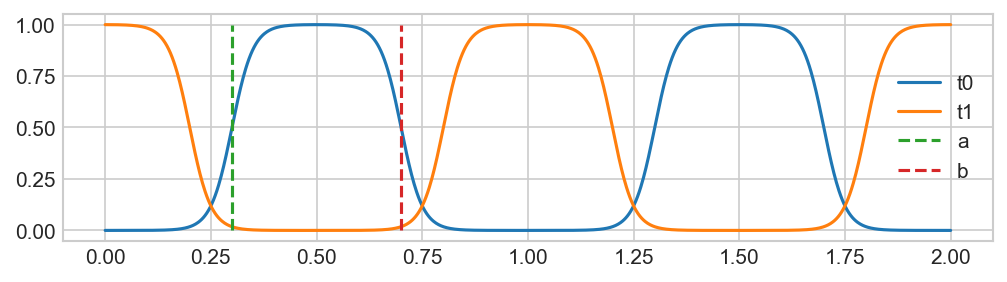

In [18]:
phase_indicator_pair = self.phase_indicator_pair
a = phase_indicator_pair.a
b = phase_indicator_pair.b

t = np.linspace(0,2,1000)
e_i0,e_i1 = phase_indicator_pair.get(t)

fig, ax= plt.subplots(1,1 ,figsize=(8,2),dpi=75)
ax.plot(t,e_i0,label="t0")
ax.plot(t,e_i1,label="t1")
ax.plot([a,a],[0,1],'--',label='a')
ax.plot([b,b],[0,1],'--',label='b')
plt.legend(loc='best', frameon=False)

In [3]:
import numba
numba.NUMBA_CACHE_DIR

AttributeError: module 'numba' has no attribute 'NUMBA_CACHE_DIR'

In [4]:
import os
os.environ['NUMBA_CACHE_DIR']

KeyError: 'NUMBA_CACHE_DIR'

In [1]:
from robot_utils import *

In [2]:
from scipy.spatial.transform import Rotation


array([[ 0.01944999,  0.9998108 , -0.22748634, ..., -0.0181851 ,
        -0.00560585, -0.75      ],
       [ 0.02036319,  0.99979264, -0.22569387, ..., -0.01477644,
        -0.01147172, -0.740625  ],
       [ 0.02027249,  0.9997945 , -0.22445825, ..., -0.01006838,
        -0.01453807, -0.73125   ],
       ...,
       [ 0.01138384,  0.9999352 , -0.2276463 , ..., -0.00633255,
        -0.01740123, -0.76875   ],
       [ 0.01476194,  0.99989104, -0.22841248, ..., -0.01773653,
        -0.01139483, -0.759375  ],
       [ 0.01759291,  0.9998452 , -0.2283772 , ..., -0.02265632,
        -0.00933098, -0.75      ]], dtype=float32)

In [2]:
import zarr
import numpy as np

In [4]:
a = np.random.rand(int(1e6), 316)

In [5]:
a.shape

(1000000, 316)

In [7]:
from numcodecs import Blosc
compressor = Blosc(clevel=1)
c = zarr.array(a,compressor = compressor)

In [8]:
c.info

Type,zarr.core.Array
Data type,float64
Shape,"(1000000, 316)"
Chunk shape,"(31250, 10)"
Order,C
Read-only,False
Compressor,"Blosc(cname='lz4', clevel=1, shuffle=SHUFFLE, blocksize=0)"
Store type,builtins.dict
No. bytes,2528000000 (2.4G)
No. bytes stored,2241804241 (2.1G)
Storage ratio,1.1


In [9]:
zarr.save('data/example.zarr', a)

In [27]:
b = zarr.load('data/example.zarr')

In [10]:
z = zarr.zeros(shape=(10000, 10000), chunks=(1000, 1000))
z.info

Type,zarr.core.Array
Data type,float64
Shape,"(10000, 10000)"
Chunk shape,"(1000, 1000)"
Order,C
Read-only,False
Compressor,"Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)"
Store type,builtins.dict
No. bytes,800000000 (762.9M)
No. bytes stored,347
Storage ratio,2305475.5


In [19]:
z  = np.zeros(shape=(10000, 10000))
%timeit _=z[:3]

220 ns ± 5.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [17]:
%timeit _=z[:3]

188 µs ± 5.51 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [6]:
import os

In [7]:
os.getcwd()

'D:\\repo\\FlexipodFast\\src\\py_src'

In [28]:
from numcodecs import blosc

In [33]:
blosc.set_nthreads(32)

32

In [77]:
blosc.get_nthreads()

32